<a href="https://colab.research.google.com/github/prog815/lernDLpython/blob/master/%D0%9A%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F_%D1%82%D0%B5%D0%BA%D1%81%D1%82%D0%B0_%D0%BE%D0%B1%D0%B7%D0%BE%D1%80%D0%BE%D0%B2_%D1%84%D0%B8%D0%BB%D1%8C%D0%BC%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Классификация текста обзоров фильмов

Енин А.В.

Оренбург

15.08.2019

[VK](https://vk.com/alekseyenin)
[OK](http://ok.ru/profile/404477133)
[Twitter](https://twitter.com/EninAleksey)
[FB](https://www.facebook.com/alex.prog.1)
[Telegramm](https://t.me/AleseyEnin)
[Habr](https://habr.com/ru/users/eavprog/posts/)
[VC](https://vc.ru/u/262921-aleksey-enin)
[GitHub](https://github.com/prog815)

Образец

https://www.tensorflow.org/tutorials/keras/basic_text_classification

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)

1.14.0


# импортируем данные

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


# смотрим на данные

In [4]:
x_train.shape

(25000,)

In [5]:
x_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [6]:
y_train.shape

(25000,)

In [7]:
y_train

array([1, 0, 0, ..., 0, 1, 0])

# готовим данные

## обрезаем

In [0]:
inp_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,maxlen=256)
inp_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,maxlen=256)

In [9]:
inp_train.shape

(25000, 256)

In [10]:
inp_test.shape

(25000, 256)

In [11]:
inp_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    1,   14,   22,   16,   43,  530,
        973, 1622, 1385,   65,  458, 4468,   66, 3941,    4,  173,   36,
        256,    5,   25,  100,   43,  838,  112,   50,  670,    2,    9,
         35,  480,  284,    5,  150,    4,  172,  112,  167,    2,  336,
        385,   39,    4,  172, 4536, 1111,   17,  546,   38,   13,  447,
          4,  192,   50,   16,    6,  147, 2025,   19,   14,   22,    4,
       1920, 4613,  469,    4,   22,   71,   87,   12,   16,   43,  530,
         38,   76,   15,   13, 1247,    4,   22,   17,  515,   17,   12,
         16,  626,   18,    2,    5,   62,  386,   12,    8,  316,    8,
        106,    5,    4, 2223, 5244,   16,  480,   66, 3785,   33,    4,
        130,   12,   16,   38,  619,    5,   25,  1

# создаем модель

In [12]:
voc_size = 10000
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(voc_size,16),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(16,activation=tf.nn.relu),
    tf.keras.layers.Dense(1,activation=tf.nn.sigmoid)
])

W0817 04:32:11.754267 140054992779136 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/initializers.py:119: calling RandomUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0817 04:32:11.759812 140054992779136 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [13]:
model.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.binary_crossentropy,metrics=["accuracy"])

W0817 04:32:11.876640 140054992779136 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


# учим модель

In [14]:
hist = model.fit(inp_train,y_train,batch_size=512,epochs=40,validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/40
20000/20000 [==============================] - 1s 59us/sample - loss: 0.6916 - acc: 0.5631 - val_loss: 0.6886 - val_acc: 0.6260
Epoch 2/40
20000/20000 [==============================] - 0s 16us/sample - loss: 0.6823 - acc: 0.6783 - val_loss: 0.6727 - val_acc: 0.7502
Epoch 3/40
20000/20000 [==============================] - 0s 16us/sample - loss: 0.6595 - acc: 0.7677 - val_loss: 0.6410 - val_acc: 0.7714
Epoch 4/40
20000/20000 [==============================] - 0s 16us/sample - loss: 0.6177 - acc: 0.7933 - val_loss: 0.5912 - val_acc: 0.7938
Epoch 5/40
20000/20000 [==============================] - 0s 17us/sample - loss: 0.5598 - acc: 0.8193 - val_loss: 0.5322 - val_acc: 0.8082
Epoch 6/40
20000/20000 [==============================] - 0s 16us/sample - loss: 0.4947 - acc: 0.8407 - val_loss: 0.4739 - val_acc: 0.8314
Epoch 7/40
20000/20000 [==============================] - 0s 16us/sample - loss: 0.4347 - acc: 0.8575 - val_loss: 0.4

# качество модели

## качество на тесте

In [17]:
model.evaluate(inp_test,y_test)

25000/25000 [==============================] - 1s 42us/sample - loss: 0.3569 - acc: 0.8702


[0.3569279515695572, 0.87016]

## графики обучения

In [19]:
hist.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [0]:
acc = hist.history['acc']
loss = hist.history['loss']
val_acc = hist.history['val_acc']
val_loss = hist.history['val_loss']
epochs = range(1,len(acc)+1)

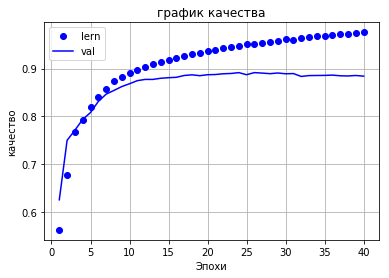

In [28]:
plt.plot(epochs,acc,'bo',label='lern')
plt.plot(epochs,val_acc,'b',label='val')
plt.xlabel('Эпохи')
plt.ylabel('качество')
plt.grid()
plt.legend()
plt.title('график качества')
plt.show()

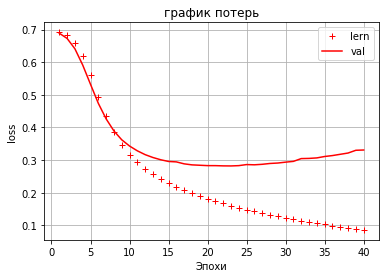

In [30]:
plt.plot(epochs,loss,'r+',label='lern')
plt.plot(epochs,val_loss,'r',label='val')
plt.xlabel('Эпохи')
plt.ylabel('loss')
plt.grid()
plt.legend()
plt.title('график потерь')
plt.show()